In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [13]:
import pandas as pd

Sunspots = pd.read_csv("Sunspots.csv")
Sunspots

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7
...,...,...,...
3260,3260,2020-09-30,0.6
3261,3261,2020-10-31,14.4
3262,3262,2020-11-30,34.0
3263,3263,2020-12-31,21.8


series: [ 96.7 104.3 116.7 ...  34.   21.8  10.4] 
series type: <class 'numpy.ndarray'>
time: [   0    1    2 ... 3262 3263 3264] 
time type: <class 'numpy.ndarray'>


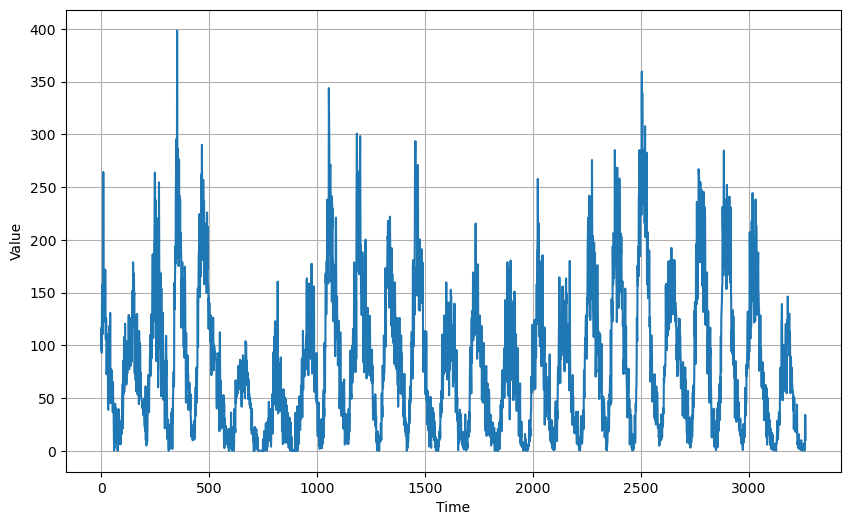

In [25]:
time = Sunspots['Unnamed: 0'].values
series = Sunspots['Monthly Mean Total Sunspot Number'].values
print("series:", series_, "\nseries type:", type(series))
print("time:",time_, "\ntime type:", type(time))

plt.figure(figsize=(10, 6))
plot_series(time, series)

* split_time = 3000: Bu, zaman serisini eğitim ve doğrulama setlerine bölecek olan zaman noktasını belirtmektedir. İlk 3000 zaman noktası (0'dan 2999'a kadar olan indeksler) eğitim setine dahil edilecek ve geri kalan zaman noktaları doğrulama setine dahil edilecektir.

* time_train = time[:split_time]: Bu satır, zaman serisi veri setinin zaman değerlerini eğitim seti için belirlenen zaman noktasına kadar olan kısmını (split_time değerine kadar olan indeksler) temsil eden time_train değişkenine atamaktadır.

* x_train = series[:split_time]: Bu satır, zaman serisi veri setinin hedef değişken değerlerini eğitim seti için belirlenen zaman noktasına kadar olan kısmını (split_time değerine kadar olan indeksler) temsil eden x_train değişkenine atamaktadır. Burada, series veri seti hedef değişkeni temsil etmektedir.

* time_valid = time[split_time:]: Bu satır, zaman serisi veri setinin zaman değerlerini doğrulama seti için belirlenen zaman noktasından itibaren (belirlenen zaman noktası dahil) geri kalan kısmını (split_time değerinden sonraki indeksler) temsil eden time_valid değişkenine atamaktadır.

* x_valid = series[split_time:]: Bu satır, zaman serisi veri setinin hedef değişken değerlerini doğrulama seti için belirlenen zaman noktasından itibaren (belirlenen zaman noktası dahil) geri kalan kısmını (split_time değerinden sonraki indeksler) temsil eden x_valid değişkenine atamaktadır.

* window_size = 30: Bu, zaman serisi veri setini işlemek için kullanılacak olan pencere boyutunu belirtir. Pencere boyutu, her bir eğitim örneğinde kullanılacak zaman adımlarının sayısını ifade eder. Bu örnekte, her bir eğitim örneği 30 zaman adımını içerecektir.

* batch_size = 32: Bu değer, eğitim sırasında kullanılacak olan toplu işlerin (batch) boyutunu belirtir. Toplu işleme, aynı anda birden fazla veri örneğinin aynı anda işlenmesini sağlar. Model eğitimi sırasında, veri seti toplu işlere bölünerek modelin daha hızlı bir şekilde güncellenmesi ve gradient hesaplamalarının verimli yapılması sağlanır. Bu örnekte, her bir toplu iş 32 veri örneğini içerecektir.

* shuffle_buffer_size = 1000: Bu değer, veri kümesini karıştırmak için kullanılan tampon boyutunu belirtir. Karıştırma, eğitim verilerinin rastgele sıralanmasını sağlar ve modelin ardışık veri örneklerine bağımlı hale gelmesini engeller. Tampon boyutu, kaç veri örneğinin karıştırma sırasında kullanılacağını belirler. Bu örnekte, 1000 veri örneği kullanılarak karıştırma işlemi gerçekleştirilecektir.

In [26]:
split_time = 3000
time_train = time[:split_time]
x_train = series[:split_time]

time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 30 #pencere boyutu
batch_size = 32 #toplu iş boyutu
shuffle_buffer_size = 1000 #karıştırma tamponu boyutu

In [27]:
time_train

array([   0,    1,    2, ..., 2997, 2998, 2999], dtype=int64)

In [28]:
time_valid

array([3000, 3001, 3002, 3003, 3004, 3005, 3006, 3007, 3008, 3009, 3010,
       3011, 3012, 3013, 3014, 3015, 3016, 3017, 3018, 3019, 3020, 3021,
       3022, 3023, 3024, 3025, 3026, 3027, 3028, 3029, 3030, 3031, 3032,
       3033, 3034, 3035, 3036, 3037, 3038, 3039, 3040, 3041, 3042, 3043,
       3044, 3045, 3046, 3047, 3048, 3049, 3050, 3051, 3052, 3053, 3054,
       3055, 3056, 3057, 3058, 3059, 3060, 3061, 3062, 3063, 3064, 3065,
       3066, 3067, 3068, 3069, 3070, 3071, 3072, 3073, 3074, 3075, 3076,
       3077, 3078, 3079, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087,
       3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098,
       3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109,
       3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120,
       3121, 3122, 3123, 3124, 3125, 3126, 3127, 3128, 3129, 3130, 3131,
       3132, 3133, 3134, 3135, 3136, 3137, 3138, 3139, 3140, 3141, 3142,
       3143, 3144, 3145, 3146, 3147, 3148, 3149, 31

* Bu fonksiyon, zaman serisi veri kümesi üzerinde belirtilen bir modeli kullanarak tahminler yapmayı sağlar. Bu şekilde, modelin eğitim sürecinde kullanılmayan verilere yönelik tahminlerde bulunabilir.

* ds = tf.data.Dataset.from_tensor_slices(series): Veri kümesini, series adlı zaman serisi verisini kullanarak bir TensorFlow Dataset nesnesine dönüştürür. Bu, veri kümesini TensorFlow ile uyumlu hale getirir.

* ds = ds.window(window_size, shift=1, drop_remainder=True): Veri kümesini pencere boyutuna (window_size) göre böler. Her bir pencere, bir adım kaydırılarak oluşturulur ve tam bir pencere oluşturulması için eksik veri noktaları (drop_remainder=True) atılır.

* ds = ds.flat_map(lambda w: w.batch(window_size)): Bölünmüş pencere verilerini düzleştirir ve her pencereyi (w) pencere boyutuna (window_size) göre birleştirir. Bu, veri kümesini düzleştirir ve her bir pencereyi tek bir veri örneği olarak ele alır.

* ds = ds.batch(32).prefetch(1): Veri kümesini toplu işlere (batch) böler. Burada, toplu iş boyutu 32 olarak ayarlanmıştır. Ayrıca, prefetch(1) işlemi, verilerin bellekte önceden yüklenmesini sağlar ve veri okuma işlemlerinin daha verimli bir şekilde gerçekleştirilmesini sağlar.

* forecast = model.predict(ds): Model üzerinde tahmin yapmak için veri kümesini kullanır. Veri kümesindeki her bir toplu işlem için modelden tahminler (forecast) elde eder.

* return forecast: Tahminleri döndürür, bu şekilde modelin bir zaman serisi üzerindeki tahminleri elde edebilirsiniz.

In [29]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
window_size = 64
batch_size = 256
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(train_set)
print(x_train.shape)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])